### Principal Component Analysis (PCA)
PCA is a dimensionality reduction technique used in Machine Learning to simplify large datasets while retaining the most important information. It helps in visualizing high-dimensional data and improving model performance by reducing noise.

In [2]:
# Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [3]:
# Load the iris dataset
iris = datasets.load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)

# Add species names dynamically instead of hardcoding
df['species'] = iris.target_names[iris.target]
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# Standardizing the features (PCA works better with standardized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df.drop(columns=['species']))  # drop() species column
X_scaled[:5]

array([[-0.90068117,  1.01900435, -1.34022653, -1.3154443 ],
       [-1.14301691, -0.13197948, -1.34022653, -1.3154443 ],
       [-1.38535265,  0.32841405, -1.39706395, -1.3154443 ],
       [-1.50652052,  0.09821729, -1.2833891 , -1.3154443 ],
       [-1.02184904,  1.24920112, -1.34022653, -1.3154443 ]])

In [5]:
# Apply PCA to reduce dimensions from 4D to 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
X_pca[:5]

array([[-2.26470281,  0.4800266 ],
       [-2.08096115, -0.67413356],
       [-2.36422905, -0.34190802],
       [-2.29938422, -0.59739451],
       [-2.38984217,  0.64683538]])

In [6]:
# Convert PCA results into a DataFrame
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['species'] = df['species']  # Use original species names
df_pca.head()

,PC1,PC2,species
0,-2.264703,0.480027,setosa
1,-2.080961,-0.674134,setosa
2,-2.364229,-0.341908,setosa
3,-2.299384,-0.597395,setosa
4,-2.389842,0.646835,setosa


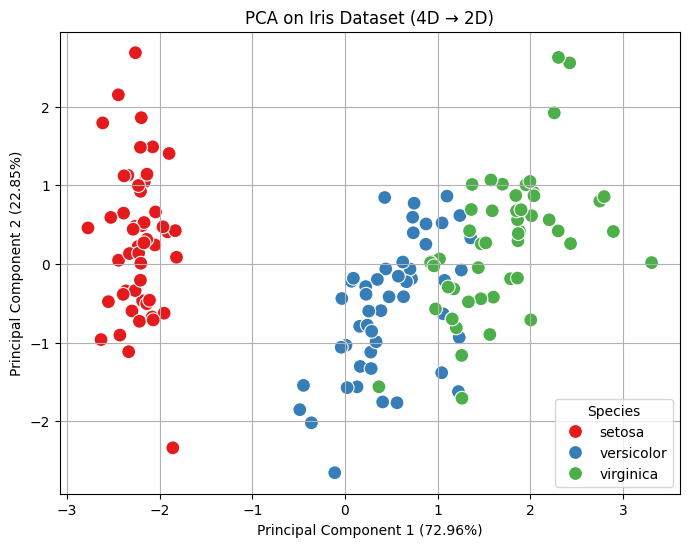

In [7]:
# Plot the PCA-transformed data
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='species', palette='Set1', s=100)
plt.title("PCA on Iris Dataset (4D → 2D)")
plt.xlabel(f"Principal Component 1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"Principal Component 2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend(title="Species")
plt.grid(True)
plt.show()

In [8]:
# Display explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)
print(df_pca.head())

Explained Variance Ratio: [0.72962445 0.22850762]
        PC1       PC2 species
0 -2.264703  0.480027  setosa
1 -2.080961 -0.674134  setosa
2 -2.364229 -0.341908  setosa
3 -2.299384 -0.597395  setosa
4 -2.389842  0.646835  setosa


### Lets check the score of 4D vs 2D data sets using LogisticRegression

In [9]:
# Split the data into features (X) and target (y)
X = df.drop(columns=['species'])  # Original 4D data
y = iris.target

In [10]:
# check first 5 rows of X and y
print(X.head()) # 4D data
print(y[:5]) # target

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2
[0 0 0 0 0]


In [11]:
# Split into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression on Original 4D Data
model_4D = LogisticRegression()
model_4D.fit(X_train, y_train)
y_pred_4D = model_4D.predict(X_test)
accuracy_4D = accuracy_score(y_test, y_pred_4D)
accuracy_4D

0.9333333333333333

In [12]:
# Split PCA data into training and testing sets
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Train Logistic Regression on 2D PCA Data
model_2D = LogisticRegression()
model_2D.fit(X_train_pca, y_train_pca)
y_pred_2D = model_2D.predict(X_test_pca)
accuracy_2D = accuracy_score(y_test_pca, y_pred_2D)
accuracy_2D

0.9

In [13]:
# Print accuracy scores
print(f"Accuracy with Original 4D Data: {accuracy_4D:.4f}")
print(f"Accuracy with PCA Reduced 2D Data: {accuracy_2D:.4f}")

# Explained Variance Ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_)

Accuracy with Original 4D Data: 0.9333
Accuracy with PCA Reduced 2D Data: 0.9000
Explained Variance Ratio: [0.72962445 0.22850762]


### Observations
The original 4D data usually performs better because it contains all feature information.
The PCA 2D data has slightly lower accuracy since it compresses the information, but it still performs well (~90%).
 - The explained variance ratio tells us how much of the original data’s information is retained.
 - The first principal component (PC1) captures the largest amount of variance (information). PC1 retains 72% of the original data’s information.
 - The second principal component (PC2) captures the next highest variance. PC2 retains 23% of the information.
 - Together, PC1 + PC2 = 95% of the data’s information is preserved.